## Datawrangling the CDC BRFSS (Centers for Disease Control and Prevention, Behavioral Risk Factor Surveillance System) Dataset

#### Section 2: Data analysis and cleanup

### Table of Contents
1. [Objective](#1.-Objective)
2. [The Dataset](#2.-The-Dataset)
3. [Import Libraries](#3.-Import-Libraries)
4. [Data Inspection, Auditing](#4.-Data-Inspection,-Auditing)
5. [Feature Analysis](#5.-Feature-Analysis)
6. [More Data Cleaning tasks](#6.-More-Data-Cleaning-tasks)
7. [Summary](#7.-Summary)

### 1. Objective

The objective of this data wrangling step is to transform and standardize the dataset by consolidating mixed numeric and categorical features, addressing missing values, reclassifying redundant columns, and ensuring consistency across all features. 

These steps aim to enhance the dataset's usability for accurate analysis and modeling, enabling meaningful insights into mental health status and related factors.

### 2. The Dataset

The [CDC dataset](https://www.cdc.gov/brfss/annual_data/annual_2023.html) consists of two XPT files for the years [2022](https://www.cdc.gov/brfss/annual_data/2022/files/LLCP2022XPT.zip) and [2023, 2024](https://www.cdc.gov/brfss/annual_data/2023/files/LLCP2023XPT.zip), exported from SAS V9.4 in XPT transport format. The files contain 326 variables for 2022 and 350 variables for 2023, representing combined landline and cellular telephone survey data from states that conducted multiple questionnaire versions and used optional modules.

The two files will be merged into a single dataset using an intersection merge to retain only the common features. Columns deemed unrelated or unimportant to the mental health objective will be analyzed and removed during initial processing.

Column descriptions are provided in the accompanying codebook files (located in the 'data' directory):

- USCODE22_LLCP_102523.HTML ([CDC Link](https://www.cdc.gov/brfss/annual_data/2022/zip/codebook22_llcp-v2-508.zip))
- USCODE23_LLCP_091024.HTML ([CDC Link](https://www.cdc.gov/brfss/annual_data/2023/zip/codebook23_llcp-v2-508.zip))

The raw XPT data files (also located in the 'data' directory):

- LLCP2022.XPT (1.16GB) ([CDC Link](https://www.cdc.gov/brfss/annual_data/2022/files/LLCP2022XPT.zip))
- LLCP2023.XPT (1.2GB) ([CDC Link](https://www.cdc.gov/brfss/annual_data/2023/files/LLCP2023XPT.zip))

### 3. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Set default dataframe behaviors
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', None)

# Autoload local libraries, if any
%reload_ext autoreload
%autoreload 2

### 4. Data Inspection, Auditing

####  Load the merged dataset from file.

In [2]:
# First, load the previously merged 2022, 2023 CDC datasets.

merged_cdc_csv = './data/llcp_2022_2023.csv'
mh_df = pd.read_csv(merged_cdc_csv, index_col=0)

In [3]:
# Visual checking columns and values.
mh_df.head()

,_STATE,STATERE1,LADULT1,LANDSEX2,LNDSXBRT,CADULT1,CELLSEX2,CELSXBRT,CSTATE1,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,MEDCOST1,CHECKUP1,EXEROFT1,BPHIGH6,BPMEDS1,CHOLCHK3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,MARITAL,EDUCA,VETERAN3,EMPLOY1,INCOME3,PREGNANT,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKDAY2,USENOW3,ALCDAY4,CIMEMLO1,CDWORRY,CDDISCU1,CDHOUS1,CDSOCIA1,FIREARM5,BIRTHSEX,TRNSGNDR,MARIJAN1,ACEDEPRS,LSATISFY,EMTSUPRT,SDLONELY,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,RRCLASS3,QSTLANG,_METSTAT,_URBSTAT,_MENT14D
0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,88.0,NaN,2.0,2.0,NaN,1.0,1.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,2.0,7.0,99.0,NaN,2.0,1.0,2.0,2.0,NaN,3.0,888.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,2.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,NaN,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,88.0,NaN,2.0,2.0,106.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,5.0,2.0,7.0,99.0,NaN,2.0,2.0,2.0,2.0,NaN,3.0,888.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,2.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,NaN,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,6.0,2.0,1.0,1.0,1.0,205.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,4.0,2.0,7.0,2.0,NaN,1.0,1.0,2.0,2.0,3.0,3.0,888.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,4.0,NaN,NaN,2.0,4.0,3.0,2.0,2.0,5.0,1.0,1.0,1.0,3.0,NaN,1.0,1.0,1.0,2.0
3,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,88.0,88.0,2.0,3.0,103.0,3.0,NaN,3.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,5.0,2.0,7.0,99.0,NaN,2.0,1.0,2.0,2.0,NaN,3.0,888.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,1.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,NaN,1.0,2.0,1.0,1.0
4,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,88.0,88.0,NaN,2.0,1.0,102.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,5.0,2.0,8.0,7.0,NaN,1.0,1.0,2.0,1.0,NaN,2.0,202.0,1.0,1.0,2.0,2.0,2.0,NaN,NaN,4.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0


In [4]:
mh_df.shape

(709532, 70)

There are 709,532 data points with 77 columns.

In [5]:
mh_df.describe()

,_STATE,STATERE1,LADULT1,LANDSEX2,LNDSXBRT,CADULT1,CELLSEX2,CELSXBRT,CSTATE1,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,MEDCOST1,CHECKUP1,EXEROFT1,BPHIGH6,BPMEDS1,CHOLCHK3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,MARITAL,EDUCA,VETERAN3,EMPLOY1,INCOME3,PREGNANT,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKDAY2,USENOW3,ALCDAY4,CIMEMLO1,CDWORRY,CDDISCU1,CDHOUS1,CDSOCIA1,FIREARM5,BIRTHSEX,TRNSGNDR,MARIJAN1,ACEDEPRS,LSATISFY,EMTSUPRT,SDLONELY,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,RRCLASS3,QSTLANG,_METSTAT,_URBSTAT,_MENT14D
count,709532.000000,158767.0,158767.000000,60959.000000,137.000000,550764.0,279641.000000,1892.000000,550749.000000,709532.000000,709530.000000,709530.000000,709532.000000,412385.000000,709530.000000,709531.000000,266442.000000,356261.000000,148753.000000,356261.000000,315218.000000,709531.000000,709532.000000,709531.000000,106957.000000,709532.000000,709531.000000,709532.000000,709527.000000,709532.000000,709532.000000,709532.000000,709530.000000,709531.000000,709531.000000,709532.000000,709530.000000,123648.000000,709530.000000,709531.000000,709530.000000,709530.000000,277962.000000,709531.000000,709529.000000,128550.000000,21471.000000,21472.000000,21472.000000,21472.000000,113799.000000,159529.000000,479660.000000,174875.000000,98723.000000,455670.000000,455670.000000,214052.000000,455670.000000,455670.000000,455669.000000,455669.000000,455668.000000,455669.000000,455670.000000,291341.000000,709532.000000,693208.000000,693208.000000,709532.000000
mean,31.052000,1.0,1.001669,1.626766,1.481752,1.0,1.523249,1.510042,1.000668,1.535170,2.612038,58.468193,58.149360,51.726772,1.936578,1.428153,153.373199,2.185639,1.192420,2.630919,1.700541,1.974145,1.991074,1.973986,1.468955,1.949124,1.907972,1.944242,1.821986,1.973767,1.681771,2.743919,2.371977,5.076637,1.895678,3.943560,21.347981,2.003000,1.919279,1.857774,1.971160,1.942889,2.515211,2.965388,517.460093,1.903399,1.477481,1.599618,1.698258,1.847662,2.127769,1.560588,4.045336,79.125238,1.955664,1.680356,1.927706,4.037019,1.962694,1.926987,4.655965,1.941166,1.964340,1.956315,3.889503,3.520229,1.042279,1.283629,1.133839,1.667496
std,16.753141,0.0,0.040821,0.525197,0.501501,0.0,0.555254,0.500031,0.025841,0.498762,1.077120,37.756130,37.964235,38.858852,0.420153,1.106793,108.450971,1.055043,0.503866,1.625597,0.652539,0.463279,0.563869,0.370136,1.085641,0.519637,0.512130,0.454249,0.592543,0.407574,0.638017,0.760520,1.784262,1.027545,0.463661,2.892905,31.572976,0.474387,0.572128,0.517376,0.324564,0.438371,0.851280,0.369209,358.611984,0.734730,0.699553,0.667653,0.645489,0.780709,1.939235,0.665826,0.543106,24.019999,1.046027,0.891997,1.249775,1.046496,0.644086,0.495152,0.893886,0.521578,0.455692,0.441596,1.183583,13.567649,0.205020,0.450759,0.340479,1.233582
min,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,2.000000,14.000000,12.000000,7.000000,2.000000,1.000000,103.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,4.000000,2.000000,1.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,202.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,88.000000,2.000000,1.000000,1.000000,3.000000,2.0000

Some columns have value ranges of 100 to 999, check for numeric, continuous values.
Check for appropriate categorical values and labels.

From the visual inspection above, we see the following:
- Missing Values: Evaluate each column missing values and decide whether to impute them or remove the affected rows/columns.
- Date Components: Currently formatted as b'value'; reformat these to a numeric data type.
- Numeric Columns: All numeric columns are of float type; determine if any should be converted to int for consistency.
- Survey Type Columns (e.g., LADULT1, LNDSXBRT): These represent specific survey types (Landline vs. Cellphone). Combine these columns into a new consolidated column, and then remove the original survey-specific columns.



#### Check for missing values.

In [6]:
mh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709532 entries, 0 to 709531
Data columns (total 70 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    709532 non-null  float64
 1   STATERE1  158767 non-null  float64
 2   LADULT1   158767 non-null  float64
 3   LANDSEX2  60959 non-null   float64
 4   LNDSXBRT  137 non-null     float64
 5   CADULT1   550764 non-null  float64
 6   CELLSEX2  279641 non-null  float64
 7   CELSXBRT  1892 non-null    float64
 8   CSTATE1   550749 non-null  float64
 9   SEXVAR    709532 non-null  float64
 10  GENHLTH   709530 non-null  float64
 11  PHYSHLTH  709530 non-null  float64
 12  MENTHLTH  709532 non-null  float64
 13  POORHLTH  412385 non-null  float64
 14  MEDCOST1  709530 non-null  float64
 15  CHECKUP1  709531 non-null  float64
 16  EXEROFT1  266442 non-null  float64
 17  BPHIGH6   356261 non-null  float64
 18  BPMEDS1   148753 non-null  float64
 19  CHOLCHK3  356261 non-null  float64
 20  CHOLMED3 

Some columns have fewer non-null values than the total number of entries in the dataset.

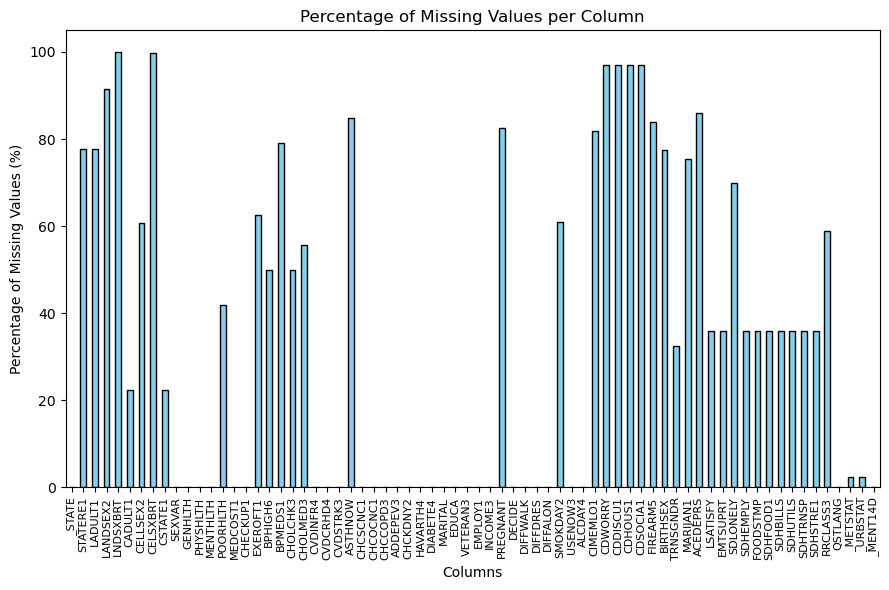

In [7]:
missing_percentage = (mh_df.isnull().sum() / len(mh_df)) * 100

# Bar plot for missing values
plt.figure(figsize=(9, 6))
missing_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

The chart above shows some features having significant number of missing values. For some it is reasonable as not all respondents can be pregnant at the time of the survey. Some may have asthma, but probably not a lot of respondents would have suffered asthma.

The dataset contains some data points from 2024, indicating that it spans three years of survey data.

#### Check for duplicates

In [8]:
mh_df.duplicated().sum()

728

#### Check for feature diversity

In [9]:
mh_df.nunique().T

_STATE       54
STATERE1      1
LADULT1       2
LANDSEX2      5
LNDSXBRT      2
CADULT1       1
CELLSEX2      5
CELSXBRT      2
CSTATE1       2
SEXVAR        2
GENHLTH       7
PHYSHLTH     33
MENTHLTH     33
POORHLTH     33
MEDCOST1      4
CHECKUP1      7
EXEROFT1    153
BPHIGH6       6
BPMEDS1       4
CHOLCHK3      9
CHOLMED3      4
CVDINFR4      4
CVDCRHD4      4
CVDSTRK3      4
ASTHNOW       4
CHCSCNC1      4
CHCOCNC1      4
CHCCOPD3      4
ADDEPEV3      4
CHCKDNY2      4
HAVARTH4      4
DIABETE4      6
MARITAL       7
EDUCA         7
VETERAN3      4
EMPLOY1       9
INCOME3      13
PREGNANT      4
DECIDE        4
DIFFWALK      4
DIFFDRES      4
DIFFALON      4
SMOKDAY2      5
USENOW3       5
ALCDAY4      40
CIMEMLO1      4
CDWORRY       4
CDDISCU1      4
CDHOUS1       4
CDSOCIA1      4
FIREARM5      4
BIRTHSEX      4
TRNSGNDR      6
MARIJAN1     33
ACEDEPRS      4
LSATISFY      6
EMTSUPRT      7
SDLONELY      7
SDHEMPLY      4
FOODSTMP      4
SDHFOOD1      7
SDHBILLS      4
SDHUTILS

Interpret our findings in the next section.

### 5. Feature Analysis

#### 1. Target feature

**_MENT14D** is the response variable. The column directly represents a computed mental health status categorized into:

  - 1 - Zero days of poor mental health (healthy group).
  - 2 - 1-13 days of poor mental health (moderate group).
  - 3 - 14+ days of poor mental health (severe group).

#### 2. Categorical mixed with numeric values
There are columns that have a mix of categorical and numeric range. We can group these values into broader, intuitive categories. For example,

**<u>EXEROFT1</u>**

Column Values
  - 101-199: Weekly activity frequency. The leading 1 is flag to indicate weekly unit.
  - 201-299: Monthly activity frequency. The leading 2 is flag to indicate monthly unit.
  - 777: Uncertain responses.
  - 999: Refused responses.
  - BLANK: Missing or skipped responses.
  
Define New Categories
  - Weekly: Consolidate 101-199
  - Monthly: Consolidate 201-299.
  - 777 - Uncertain: Include 777.
  - 999 - Refused: Include 999.
  - BLANK - Missing: set to 777, assuming that there are no different underlying cause and have a similar meaning or impact.

  Columns: ALCDAY4, EXEROFT1

**<u>PHYSHLTH</u>**

Column Values
  - 1–30: Continuous numeric values (important for prediction).
  - 88 (None): Could represent 0 days.
  - 77 (Don’t know/Not sure) and 99 (Refused): Represent uncertainty or lack of response (consider treating these as separate categories or imputing based on context).
  - BLANK: Missing data (requires imputation or exclusion).

Define as continuous, numeric feature:
  - Map 88 (None) to 0.
  - Map 77 (Don’t know/Not sure) to -1.
  - Map 99 (Refused) to -2.
  - Map BLANK (Missing) to -3.

Columns: *PHYSHLTH, MENTHLTH, POORHLTH, MARIJAN1*

#### 3. Missing values in columns labeled BLANK
As described in the data codebook Missing value is labeled BLANK(Not asked or Missing). NaN values in the following columns should be defined as category 0 for None.

*STATERE1, LADULT1, LANDSEX2, LNDSXBRT, CADULT1, CELSXBRT, CELLSEX2, CSTATE1, GENHLTH, PRIMINS1, PERSDOC3, MEDCOST1, CHECKUP1, BPHIGH6, SDHTRNSP, SDHSTRE1, RRCLASS3, _METSTAT, _URBSTAT, CDWORRY, CDDISCU1, CDHOUS1, CDSOCIA1, FIREARM5, BIRTHSEX, TRNSGNDR, ACEDEPRS, LSATISFY, EMTSUPRT, SDLONELY, SDHEMPLY, FOODSTMP, SDHFOOD1, SDHBILLS, SDHUTILS, BLIND, DECIDE, DIFFWALK, DIFFDRES, DIFFALON, SMOKDAY2, USENOW3, CIMEMLO1, CHCKDNY2, HAVARTH4, DIABETE4, MARITAL, EDUCA, VETERAN3, EMPLOY1, INCOME3, PREGNANT, DEAF, BPMEDS1, CHOLCHK3, CHOLMED3, CVDINFR4, CVDCRHD4, CVDSTRK3, ASTHNOW, CHCSCNC1, CHCOCNC1, CHCCOPD3, ADDEPEV3*


#### 4. QSTLANG Categories
1 English, 2 Spanish, 3-99 Other. Recategorize 3-99 to 3.

#### 5. Landline vs. Cellphone Survey columns
- SEXVAR, LANDSEX2, CELLSEX2, LNDSXBRT, CELSXBRT, BIRTHSEX. Drop columns after combining into a new column SEX.
- *_STATE, STATERE1, CSTATE1*. Drop the rest and combine into _STATE.
- *LADULT1, CADULT1*. Drop after combinining into a new columns ADULT.
- *_URBSTAT, _METSTAT*. Drop after combining into _URBSTAT.

#### 6. Ensure Proper Data Types
Convert all numeric features to integer types. 

### 6. More Data Cleaning tasks

#### Categorialize

In [10]:
# Convert range values to class label for the columns listed.

# Weekly: Consolidate 101-199
# Monthly: Consolidate 201-299.
# 777 - Uncertain: Include 777.
# 999 - Refused: Include 999.
# BLANK - Missing: set to 777, assuming that there are no different underlying cause and have a similar meaning or impact.

#   'weekly': Consolidate 101-199.
#   'monthly': Consolidate 201-299.
def categorize(value):
  if 101 <= value <= 199:
      return 1 #'weekly'
  elif 201 <= value <= 299:
      return 2 #'monthly'
  #elif value == 777 or pd.isna(value):  # Handle BLANK (NaN) as 777
  #    return 3 #'uncertain'
  #elif value == 999:
  #    return 4 #'refused'
  else:
      return 3 # Default to uncertain

num_to_cat_cols = ['ALCDAY4', 'EXEROFT1']
for col in num_to_cat_cols:
  mh_df[col] = mh_df[col].apply(categorize)


In [11]:
# Group QSTLANG values 3-99 to new category to 3 (Other).
mh_df['QSTLANG'] = mh_df['QSTLANG'].apply(lambda x: 3 if x >= 3 and x <= 99 else x)


#### Numericalize

In [12]:
# Define continuous, numeric feature:

# Map 88 (None) to 0.
# Map 77 (Don’t know/Not sure) to -1.
# Map 99 (Refused) to -2.
# Map BLANK (Missing) to -3.

def cat_to_num(value):
  if value == 88:
    return 0
  elif value == 77:
    return -1
  elif value == 99:
    return -2
  elif np.isnan(value):
    return -3
  return value

cat_to_num_cols = ['PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'MARIJAN1']
for col in cat_to_num_cols:
  mh_df[col] = mh_df[col].apply(cat_to_num)


#### Handle Missing Values

In [13]:
NaN_to_blank_cols = [
  'STATERE1', 'LADULT1', 'LANDSEX2', 'LNDSXBRT', 'CADULT1', 'CELSXBRT', 'CELLSEX2',
  'CSTATE1', 'GENHLTH',
  'MEDCOST1', 'CHECKUP1', 'EXEROFT1', 'BPHIGH6', 'SDHTRNSP', 'SDHSTRE1', 'RRCLASS3',
  '_METSTAT', '_URBSTAT', 'CDWORRY', 'CDDISCU1', 'CDHOUS1', 'CDSOCIA1', 'FIREARM5',
  'BIRTHSEX', 'TRNSGNDR', 'ACEDEPRS', 'LSATISFY', 'EMTSUPRT', 'SDLONELY',
  'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHBILLS', 'SDHUTILS', 'DECIDE',
  'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKDAY2', 'USENOW3', 'ALCDAY4', 'CIMEMLO1',
  'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'MARITAL', 'EDUCA', 'VETERAN3', 'EMPLOY1',
  'INCOME3', 'PREGNANT', 'BPMEDS1', 'CHOLCHK3', 'CHOLMED3', 'CVDINFR4',
  'CVDCRHD4', 'CVDSTRK3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3']

# Create category BLANK=0 for the columns listed.
for col in NaN_to_blank_cols:
  mh_df[col] = mh_df[col].fillna(0)

#### Combine redundant columns

In [14]:
# Combine CELLSEX2 and LANDSEX2 and assign to SEX, then drop columns
mh_df['SEX'] = mh_df['LANDSEX2'].combine_first(mh_df['CELLSEX2'])
mh_df['SEX'] = mh_df['SEX'].combine_first(mh_df['SEXVAR'])
mh_df.drop(columns=['CELLSEX2', 'LANDSEX2', 'SEXVAR'], inplace=True)
# Combine CSTATE1, STATERE1 - Landline vs Cellphone response origin
mh_df['_STATE'] = mh_df['_STATE'].combine_first(mh_df['STATERE1'])
mh_df['_STATE'] = mh_df['_STATE'].combine_first(mh_df['CSTATE1'])
mh_df.drop(columns=['STATERE1', 'CSTATE1'], inplace=True)
# Combine CADULT1, LADULT1 - Landline vs Cellphone response origin
mh_df['ADULT'] = mh_df['LADULT1'].combine_first(mh_df['CADULT1'])
mh_df.drop(columns=['LADULT1', 'CADULT1'], inplace=True)
# BIRTHSEX as well, TRNSGNDR is not as important right now.
mh_df['SEX'] = mh_df['SEX'].combine_first(mh_df['LNDSXBRT'])
mh_df['SEX'] = mh_df['SEX'].combine_first(mh_df['CELSXBRT'])
mh_df['SEX'] = mh_df['SEX'].combine_first(mh_df['BIRTHSEX'])
mh_df.drop(columns=['BIRTHSEX', 'LNDSXBRT', 'CELSXBRT', 'TRNSGNDR'], inplace=True)

mh_df['_URBSTAT'] = mh_df['_URBSTAT'].combine_first(mh_df['_METSTAT'])
mh_df.drop(columns=['_METSTAT'], inplace=True)

##### Convert all columns to appropriate types: int64 and 'category'. 


In [15]:
# Convert numeric features to Integer.
numeric_cols = cat_to_num_cols
mh_df[numeric_cols] = mh_df[numeric_cols].astype(int)

# Convert non-numeric features to 'category'.
cat_cols = mh_df.columns[~mh_df.columns.isin(numeric_cols)] 
mh_df[cat_cols] = mh_df[cat_cols].astype('category')

In [16]:
# Verify column types
mh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709532 entries, 0 to 709531
Data columns (total 60 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   _STATE    709532 non-null  category
 1   GENHLTH   709532 non-null  category
 2   PHYSHLTH  709532 non-null  int64   
 3   MENTHLTH  709532 non-null  int64   
 4   POORHLTH  709532 non-null  int64   
 5   MEDCOST1  709532 non-null  category
 6   CHECKUP1  709532 non-null  category
 7   EXEROFT1  709532 non-null  category
 8   BPHIGH6   709532 non-null  category
 9   BPMEDS1   709532 non-null  category
 10  CHOLCHK3  709532 non-null  category
 11  CHOLMED3  709532 non-null  category
 12  CVDINFR4  709532 non-null  category
 13  CVDCRHD4  709532 non-null  category
 14  CVDSTRK3  709532 non-null  category
 15  ASTHNOW   709532 non-null  category
 16  CHCSCNC1  709532 non-null  category
 17  CHCOCNC1  709532 non-null  category
 18  CHCCOPD3  709532 non-null  category
 19  ADDEPEV3  709532 non-null  c

All columns are correctly set to int64, except for ALCDAY4 and EXEROFT1, as expected.

#### Drop duplicates

In [17]:
mh_df = mh_df.drop_duplicates()

Check for any additional missing values.

In [21]:
# Show all columns with missing values
mh_df.columns[mh_df.isnull().any()]

Index([], dtype='object')

No columns with missing values this time.

#### View the cleaned data

In [19]:
mh_df.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,MEDCOST1,CHECKUP1,EXEROFT1,BPHIGH6,BPMEDS1,CHOLCHK3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,MARITAL,EDUCA,VETERAN3,EMPLOY1,INCOME3,PREGNANT,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKDAY2,USENOW3,ALCDAY4,CIMEMLO1,CDWORRY,CDDISCU1,CDHOUS1,CDSOCIA1,FIREARM5,MARIJAN1,ACEDEPRS,LSATISFY,EMTSUPRT,SDLONELY,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,RRCLASS3,QSTLANG,_URBSTAT,_MENT14D,SEX,ADULT
27589,6.0,1.0,0,0,-3,2.0,1.0,1,3.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0,5.0,2.0,6.0,7.0,0.0,2.0,2.0,2.0,2.0,0.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,-3,0.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0
406078,12.0,5.0,30,0,30,2.0,1.0,3,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,5.0,2.0,8.0,99.0,0.0,2.0,1.0,1.0,1.0,3.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,-3,2.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0
100642,19.0,2.0,0,0,-3,2.0,1.0,1,1.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,8.0,0.0,2.0,2.0,2.0,2.0,0.0,3.0,2,0.0,0.0,0.0,0.0,0.0,0.0,-3,0.0,1.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,1.0,1.0,2.0,1.0,0.0,0.0
263542,45.0,2.0,0,0,-3,2.0,1.0,1,1.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,4.0,2.0,7.0,77.0,0.0,2.0,1.0,2.0,2.0,3.0,3.0,3,0.0,0.0,0.0,0.0,0.0,2.0,-3,0.0,2.0,7.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0,77.0,1.0,1.0,1.0,0.0,0.0
542627,31.0,3.0,0,4,1,2.0,1.0,3,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0,5.0,2.0,1.0,5.0,0.0,2.0,2.0,2.0,2.0,0.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0
445354,19.0,3.0,15,7,8,2.0,1.0,3,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,7.0,7.0,0.0,2.0,1.0,2.0,2.0,0.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,-3,2.0,2.0,2.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,3.0,0.0,1.0,2.0,2.0,0.0,0.0
393653,9.0,3.0,0,0,-3,2.0,1.0,3,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,5.0,3.0,1.0,2.0,2.0,2.0,2.0,0.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,3.0,0.0,2.0,2.0,5.0,2.0,2.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0
213305,36.0,3.0,0,15,0,2.0,1.0,3,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,3.0,4.0,2.0,7.0,6.0,0.0,2.0,2.0,2.0,2.0,3.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0
248087,40.0,3.0,0,0,-3,2.0,1.0,2,3.0,0.0,7.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,6.0,2.0,7.0,99.0,0.0,2.0,2.0,2.0,2.0,3.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
322532,53.0,4.0,12,5,8,2.0,1.0,1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,6.0,2.0,9.0,99.0,2.0,9.0,2.0,2.0,2.0,0.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0


In [40]:
mh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706627 entries, 0 to 709531
Data columns (total 60 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   _STATE    706627 non-null  category
 1   GENHLTH   706627 non-null  category
 2   PHYSHLTH  706627 non-null  int64   
 3   MENTHLTH  706627 non-null  int64   
 4   POORHLTH  706627 non-null  int64   
 5   MEDCOST1  706627 non-null  category
 6   CHECKUP1  706627 non-null  category
 7   EXEROFT1  706627 non-null  category
 8   BPHIGH6   706627 non-null  category
 9   BPMEDS1   706627 non-null  category
 10  CHOLCHK3  706627 non-null  category
 11  CHOLMED3  706627 non-null  category
 12  CVDINFR4  706627 non-null  category
 13  CVDCRHD4  706627 non-null  category
 14  CVDSTRK3  706627 non-null  category
 15  ASTHNOW   706627 non-null  category
 16  CHCSCNC1  706627 non-null  category
 17  CHCOCNC1  706627 non-null  category
 18  CHCCOPD3  706627 non-null  category
 19  ADDEPEV3  706627 non-null  c

Save cleaned data.

In [20]:
import os

# Save in pickle format to ensure the specified data types are preserved.
mh_df.to_pickle('./data/llcp_2022_2023_cleaned.pkl')

# Remove intermediate csv data
os.remove(merged_cdc_csv)

### 7. Summary

In this Datawrangling notebook, we have addressed several tasks that need to be done to prepare the dataset.

1. Initially the 2022 and 2023 datasets were converted from the original XPT format to csv format, and kept a file copy of the csv file. 
2. The datasets were then merged, leaving only columns that are common to both datasets. The merge produced 700K rows of datapoints with 60 columns. 
3. **Target Feature**:
   - **_MENT14D**: The target variable categorizes mental health status:
     - **1**: Zero days of poor mental health (Healthy group).
     - **2**: 1–13 days of poor mental health (Moderate group).
     - **3**: 14+ days of poor mental health (Severe group).
4. **Handling Categorical and Numeric Mixed Features**:
   - Columns such as **EXEROFT1** and **PHYSHLTH** were cleaned by grouping or mapping mixed values into meaningful categories:
     - **EXEROFT1**:
       - Grouped into **Weekly**, **Monthly**, **Uncertain (777)**, **Refused (999)**, and **Missing (777)**.
     - **PHYSHLTH**:
       - Numeric values (1–30) retained, while special values were mapped:
         - 88 → 0 (None)
         - 77 → -1 (Don’t know/Not sure)
         - 99 → -2 (Refused)
         - BLANK → -3 (Missing)
5. **Addressing Missing Values (BLANK)**:
   - For columns labeled as BLANK (Not asked or Missing), these were recategorized to **0 (None)** where applicable.
6. **QSTLANG Categorization**:
   - Reclassified values **3–99** into a single category **3 (Other)**.
7. **Landline vs. Cellphone Survey Data**
   - Combined redundant columns into new unified columns:
     - **SEX**: Combined **SEXVAR**, **LANDSEX2**, **CELLSEX2**, **LNDSXBRT**, **CELSXBRT**, and **BIRTHSEX**.
     - **_STATE**: Combined **_STATE**, **STATERE1**, and **CSTATE1**.
     - **ADULT**: Combined **LADULT1** and **CADULT1**.
     - **_METSTAT**: Combined **_URBSTAT** and **_METSTAT**.
   - Dropped the original columns after combining.
  
    The final column count after combining landline and cellphone data is at 67 columns.
8. **Convert all features to Integer or Category types**

These cleaning steps standardized and streamlined the dataset, ensuring consistent formats and meaningful categories for further analysis.



We are now ready to begin exploratory data analysis (EDA) on the refined and cleaned dataset.